## Show System Specifications

TensorFlow 1.x selected.
1.15.2
Show System RAM Memory:


MemTotal:       13302924 kB


Show Devices:

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4720150978323234183
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 11797195444808999998
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 1000311191283856584
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11338832282
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12397499216938308855
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]
--2021-11-13 02:21:06--  https://storage.googleapis.com/marketing-files/colab-notebooks/style-transfer/neural_style.py
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 1

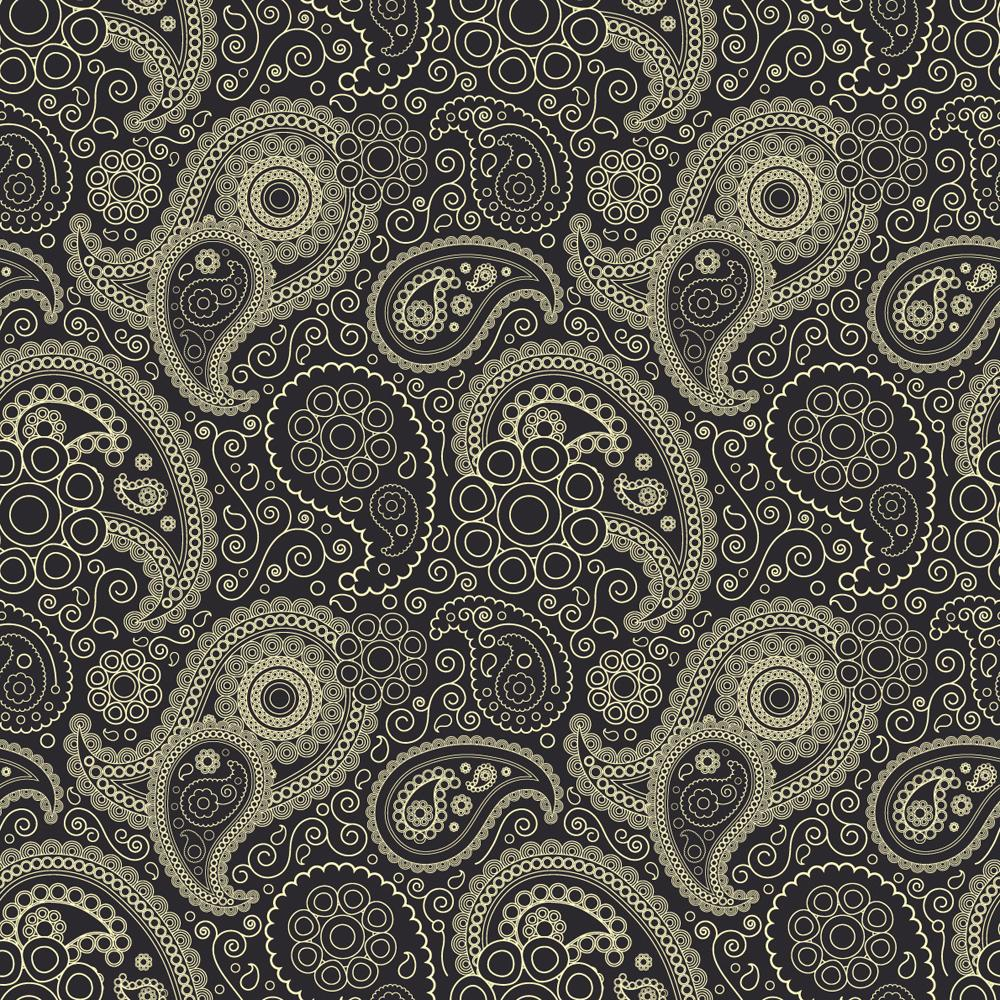

In [ ]:
%tensorflow_version 1.x

from tensorflow.python.client import device_lib;
import tensorflow as tf;

# Make sure tensorflow 1.x prints below, you may need to restart the runtime. Runtime => Restart Runtime
print(tf.__version__)

print("Show System RAM Memory:\n\n")
!cat /proc/meminfo | egrep "MemTotal*"


print("\n\nShow Devices:\n\n"+str(device_lib.list_local_devices()))

#Download neural_style.py
#This code originates from https://github.com/cysmith/neural-style-tf
!wget --output-document=neural_style.py 'https://storage.googleapis.com/marketing-files/colab-notebooks/style-transfer/neural_style.py'
  
  
#Download ImageNet VGG Very Deep
#VGG-VD models from the Very Deep Convolutional Networks for Large-Scale Visual Recognition project.
!wget --output-document=imagenet-vgg-verydeep-19.mat 'https://storage.googleapis.com/marketing-files/colab-notebooks/style-transfer/imagenet-vgg-verydeep-19.mat'
  

import re
from IPython.display import Image
import urllib.request

def download_image_from_URL(imageURL):
  imageName = re.search('[a-z0-9\-]+\.(jpe?g|png|gif|bmp)', imageURL, re.IGNORECASE)
  imageName = imageName.group(0)
  urllib.request.urlretrieve(imageURL, imageName)
  imagePath = "./" + imageName
  return imagePath
   
#Download Image from URL and Store Path in Variable

#Content image model.jpg
#imageDownload1 = download_image_from_URL("https://storage.googleapis.com/marketing-files/yt-back.png")


#Style image polygon-2.jpg
#imageDownload3 = download_image_from_URL("https://i.stack.imgur.com/ayYiJ.jpg")

#Display Local Image
#Image(imageDownload3)              

# Stylize an Image
## Single style and single content image


---- RENDERING SINGLE IMAGE ----


2021-11-13 04:07:30.833511: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-11-13 04:07:30.838883: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-13 04:07:30.839732: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.8235
pciBusID: 0000:00:04.0
2021-11-13 04:07:30.840026: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-11-13 04:07:30.841838: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-11-13 04:07:30.842870: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully open

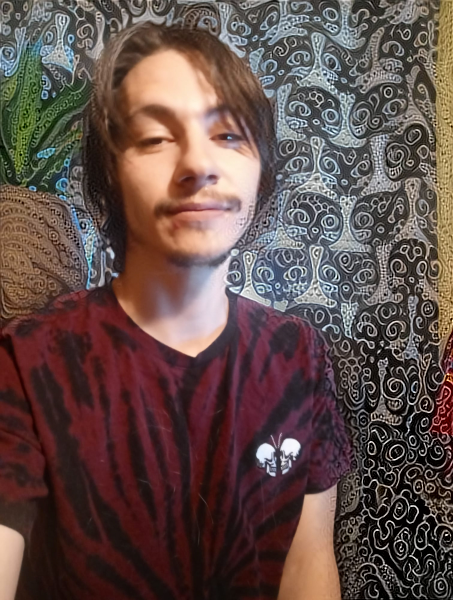

In [ ]:
%tensorflow_version 1.x
from IPython.display import Image

! python3 neural_style.py --content_img_dir ./ \
                       --content_img /content/255969873_129536322786245_7250033425828248952_n.jpg \
                       --style_imgs_dir ./ \
                       --style_imgs /content/ayYiJ.jpg \
                       --style_imgs_weights 4  \
                       --max_iterations 100 \
                       --max_size 600 \
                       --img_name output \
                       --content_weight 2 \
                       --device /gpu:0 \
                       --noise_ratio 2 \
                       --seed 2 \
                       --style_mask \
                       --original_colors \
                       --style_mask_imgs mask4.jpg \
                       --img_output_dir ./ \
                       --verbose;
                    
# Print Final Image
Image('./output/output.png')

In [ ]:
Additional Arguments

--content_img: Filename of the content image. Example: lion.jpg

--content_img_dir: Relative or absolute directory path to the content image. Default: ./image_input

--style_imgs: Filenames of the style images. To use multiple style images, pass a space-separated list. Example: --style_imgs starry-night.jpg

--style_imgs_weights: The blending weights for each style image. Default: 1.0 (assumes only 1 style image)

--style_imgs_dir: Relative or absolute directory path to the style images. Default: ./styles

--init_img_type: Image used to initialize the network. Choices: content, random, style. Default: content

--max_size: Maximum width or height of the input images. Default: 512

--content_weight: Weight for the content loss function. Default: 5e0

--style_weight: Weight for the style loss function. Default: 1e4

--tv_weight: Weight for the total variational loss function. Default: 1e-3

--temporal_weight: Weight for the temporal loss function. Default: 2e2

--content_layers: Space-separated VGG-19 layer names used for the content image. Default: conv4_2

--style_layers: Space-separated VGG-19 layer names used for the style image. Default: relu1_1 relu2_1 relu3_1 relu4_1 
relu5_1

--content_layer_weights: Space-separated weights of each content layer to the content loss. Default: 1.0

--style_layer_weights: Space-separated weights of each style layer to loss. Default: 0.2 0.2 0.2 0.2 0.2

--original_colors: Boolean flag indicating if the style is transferred but not the colors.

--color_convert_type: Color spaces (YUV, YCrCb, CIE L*u*v*, CIE L*a*b*) for luminance-matching conversion to original colors. Choices: yuv, ycrcb, luv, lab. Default: yuv

--style_mask: Boolean flag indicating if style is transferred to masked regions.

--style_mask_imgs: Filenames of the style mask images (example: face_mask.png). To use multiple style mask images, pass a space-separated list. Example: --style_mask_imgs face_mask.png face_mask_inv.png

--noise_ratio: Interpolation value between the content image and noise image if network is initialized with random. Default: 1.0

--seed: Seed for the random number generator. Default: 0

--model_weights: Weights and biases of the VGG-19 network. Download here. Default:imagenet-vgg-verydeep-19.mat

--pooling_type: Type of pooling in convolutional neural network. Choices: avg, max. Default: avg

--device: GPU or CPU device. GPU mode highly recommended but requires NVIDIA CUDA. Choices: /gpu:0 /cpu:0. Default: /gpu:0

--img_output_dir: Directory to write output to. Default: ./image_output

--img_name: Filename of the output image. Default: result

--verbose: Boolean flag indicating if statements should be printed to the console.
Optimization Arguments

--optimizer L-BFGS: Loss minimization optimizer. L-BFGS gives better results. Adam uses less memory. Choices: lbfgs, adam. Default: lbfgs

--learning_rate: Learning-rate parameter for the Adam optimizer. Default: 1e0
